In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Here I am finding the roots for the following polynomial using the bisection method, and then showing them on the plot. 

In [2]:
def genfunc(x, *par):
    
    return par[0] + par[1]*x + par[2]*x**2 + par[3]*x**3 + par[4]*x**4

par = np.array([1.8, -4.05, 0.4, 1, 1])

In [3]:
def find_roots(chunk_size, n_roots):
    
    roots = []
    root_found = 0
    i = 0
    
    while (root_found < n_roots):
        
        c = np.random.uniform(xlow, xhigh)
        a = c - chunk_size
        b = c + chunk_size
        
        fa = genfunc(a, *par)
        fb = genfunc(b, *par)
        
        epsilon = 1E-7
        diff = 1E12
        
        if (fa*fb > 0):
            i += 1
        else:
            while(diff > epsilon and i<10000):
                c = (b-a)/2+a
                fc = genfunc(c, *par)
                
                if (fa*fc < 0):
                    b = c
                    fb = genfunc(b, *par)
                    diff = np.abs(fc-fa)
                else:
                    a = c
                    fa = genfunc(a, *par)
                    diff = np.abs(fc-fb)
                i += 1
            
            already_found = False
            if root_found > 0:
                for root in roots:
                    if (np.fabs(root-c) < 5.0*epsilon):
                        already_found = True
            
            if (not already_found):
                root_found += 1
                roots.append(c)
        
    return i, roots

In [16]:
n = np.linspace(0, 1.5, 10000)

xlow = 0
xhigh = 1

i, roots = find_roots(.1, 2)
yroots = np.array([genfunc(roots[0], *par), genfunc(roots[1], *par)])
print(i, roots, yroots)

80 [0.9550567563817345, 0.527107798173168] [2.75906993e-08 1.47089770e-08]


Text(0, 0.5, 'y_values')

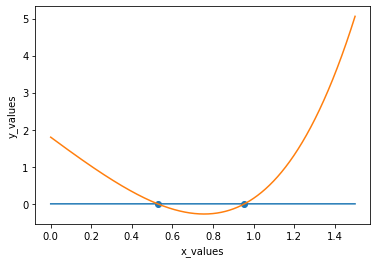

In [17]:
plt.scatter(roots, yroots)
plt.plot(n,np.zeros(10000))
plt.plot(n, genfunc(n, *par))
plt.xlabel('x_values')
plt.ylabel('y_values')

Here I use the root_find_complete code from Dr. Brash to find the roots with bisection, then the time it takes to find them given different sizes of slices of data. 

In [31]:
xl = -4
xh = 4
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []

# create list to hold values for plotting
#
# xstep will hold the number of slices
# xstep2 will hold the number of data points per slice

xstep = []
ystep = []
xstep2 = []

nroots_expected = 2

# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = genfunc(xval,*par)

In [32]:
for npts_per_slice in range(1,int(npoints/2)):
    
    start = time.time()

    # Calculate number of slices
    nslice = npoints/npts_per_slice
    
    ycomp = yval[0]
    xcomp = xval[0]
    nroots_found = 0

    # Loop over the slices, looking for possible roots in each slice
    for i in range(1,int(nslice)+1):
        y = yval[npts_per_slice*i-1]
        x = xval[npts_per_slice*i-1]
        
        if (y==0):
            if (npts_per_slice == 1):
                print ("Found exact root at x = %f\n" % x)
            nroots_found = nroots_found + 1
            
        if (y*ycomp<0.0):
            xlow = xcomp
            xhigh = x
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = genfunc(xlow,*par)
                fb = genfunc(xhigh,*par)
                xmid = (xhigh+xlow)/2.0
                fc = genfunc(xmid,*par)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (npts_per_slice == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
            xcomp = x
        else:
            ycomp = y
            xcomp = x

    if (npts_per_slice == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    
    xstep.append(nslice)
    xstep2.append(npts_per_slice)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    else:
        ystep.append(30)

Found root at x = 0.527108

Found root at x = 0.955057

Total number of roots found = 2



/tmp/ipykernel_31491/3356241236.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axs.set_xlim(0,6000)


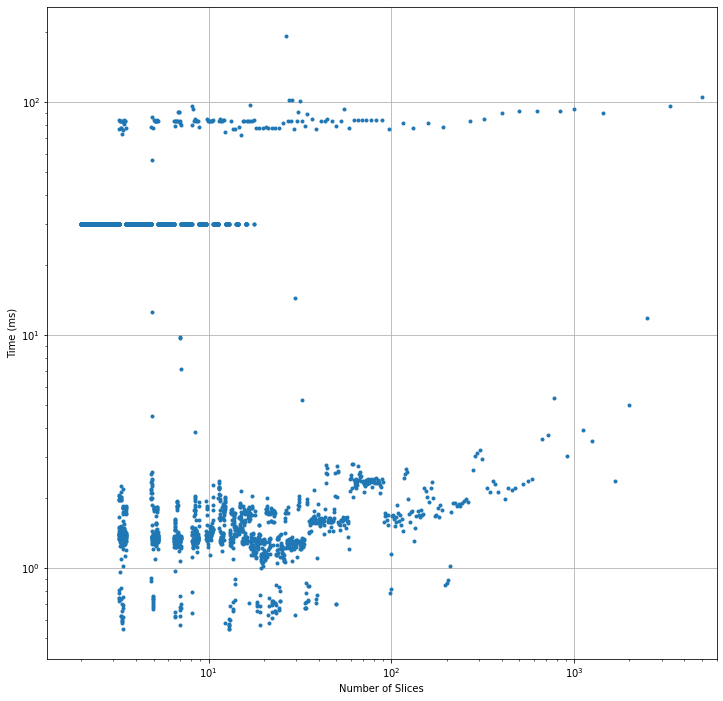

In [41]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
plt.xscale('log')
axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Number of Slices')
axs.axhline()
plt.grid(True)
axs.set_xlim(0,6000)
plt.show()

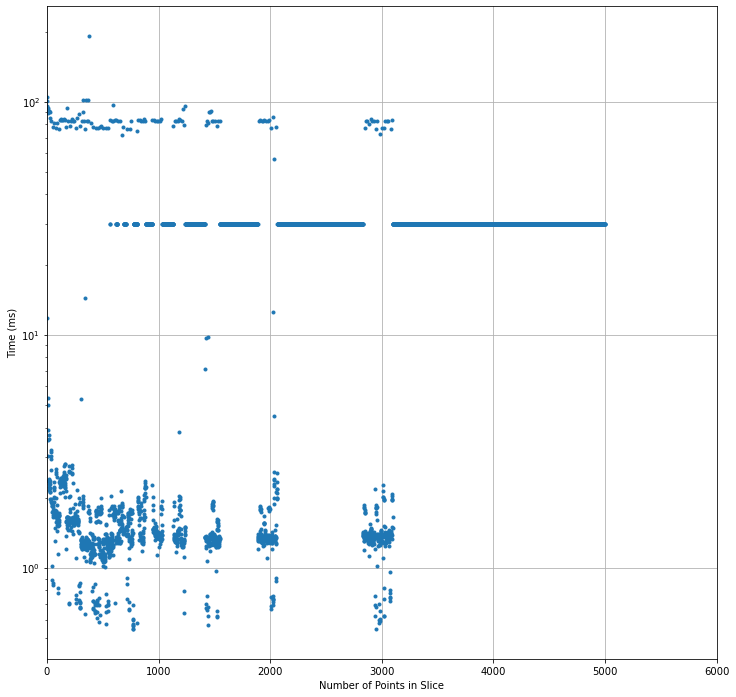

In [42]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
#plt.xscale('log')
axs.plot(xstep2,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Number of Points in Slice')
axs.axhline()
plt.grid(True)
axs.set_xlim(0,6000)
plt.show()